<ipython-input-39-cd49db67f410>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{feature}_lag_{lag}"] = df[feature].shift(lag)
<ipython-input-39-cd49db67f410>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{feature}_lag_{lag}"] = df[feature].shift(lag)
<ipython-input-39-cd49db67f410>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Precision: 0.70
Recall: 0.20
F1-Score: 0.31
Accuracy: 0.78


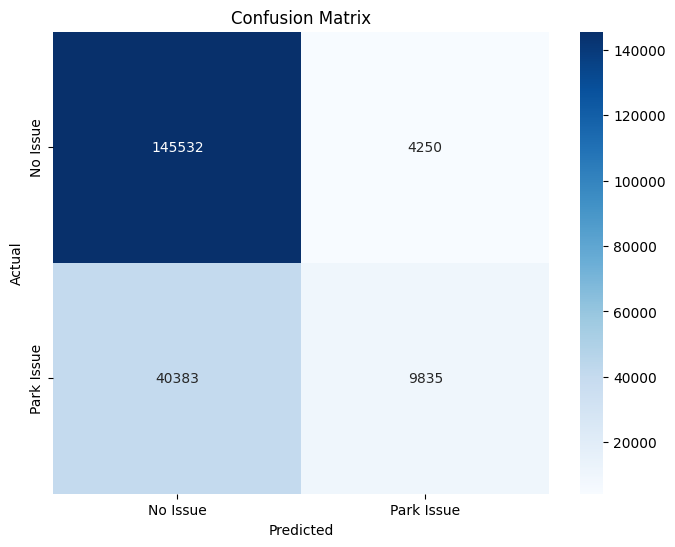


Classification Report:

              precision    recall  f1-score   support

    No Issue       0.78      0.97      0.87    149782
  Park Issue       0.70      0.20      0.31     50218

    accuracy                           0.78    200000
   macro avg       0.74      0.58      0.59    200000
weighted avg       0.76      0.78      0.73    200000



In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_name = "synthetic_park_data_1M.csv"
df = pd.read_csv(file_name)

# Shift the target variable to predict issues before they happen
df["Future_Park_Issue"] = df["Park_Issue"].shift(-1)  # Predict the next hour's Park_Issue
df = df.dropna()  # Remove rows with NaN values after shifting

# Add lag features (e.g., past 3 hours of data for each sensor)
lag_hours = 3
features = [col for col in df.columns if col not in ["Timestamp", "Plant_ID", "Park_Issue", "Future_Park_Issue"]]

for lag in range(1, lag_hours + 1):
    for feature in features:
        df[f"{feature}_lag_{lag}"] = df[feature].shift(lag)

# Drop rows with NaN values introduced by lagging
df = df.dropna()

# Separate features (X) and target (y)
X = df.drop(columns=["Timestamp", "Plant_ID", "Park_Issue", "Future_Park_Issue"])
y = df["Future_Park_Issue"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Issue", "Park Issue"], yticklabels=["No Issue", "Park Issue"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No Issue", "Park Issue"]))
